1. After importing the dataset using Pandas, start by showing the head of the dataset then some general information about the data columns and values.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import the dataset
dt = pd.read_csv('16.Titanic_Dataset_AmaniYch.csv', sep = ';')

# Show the head of the dataset
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
dt.shape

(891, 12)

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
dt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dt.duplicated().sum()

0

2. As a next step apply what you have learned in Data preprocessing to preprocess your data: find missing informations and replace them by the appropriate values.

In [7]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Dropping unnecessary columns
dts = dt.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

<Axes: >

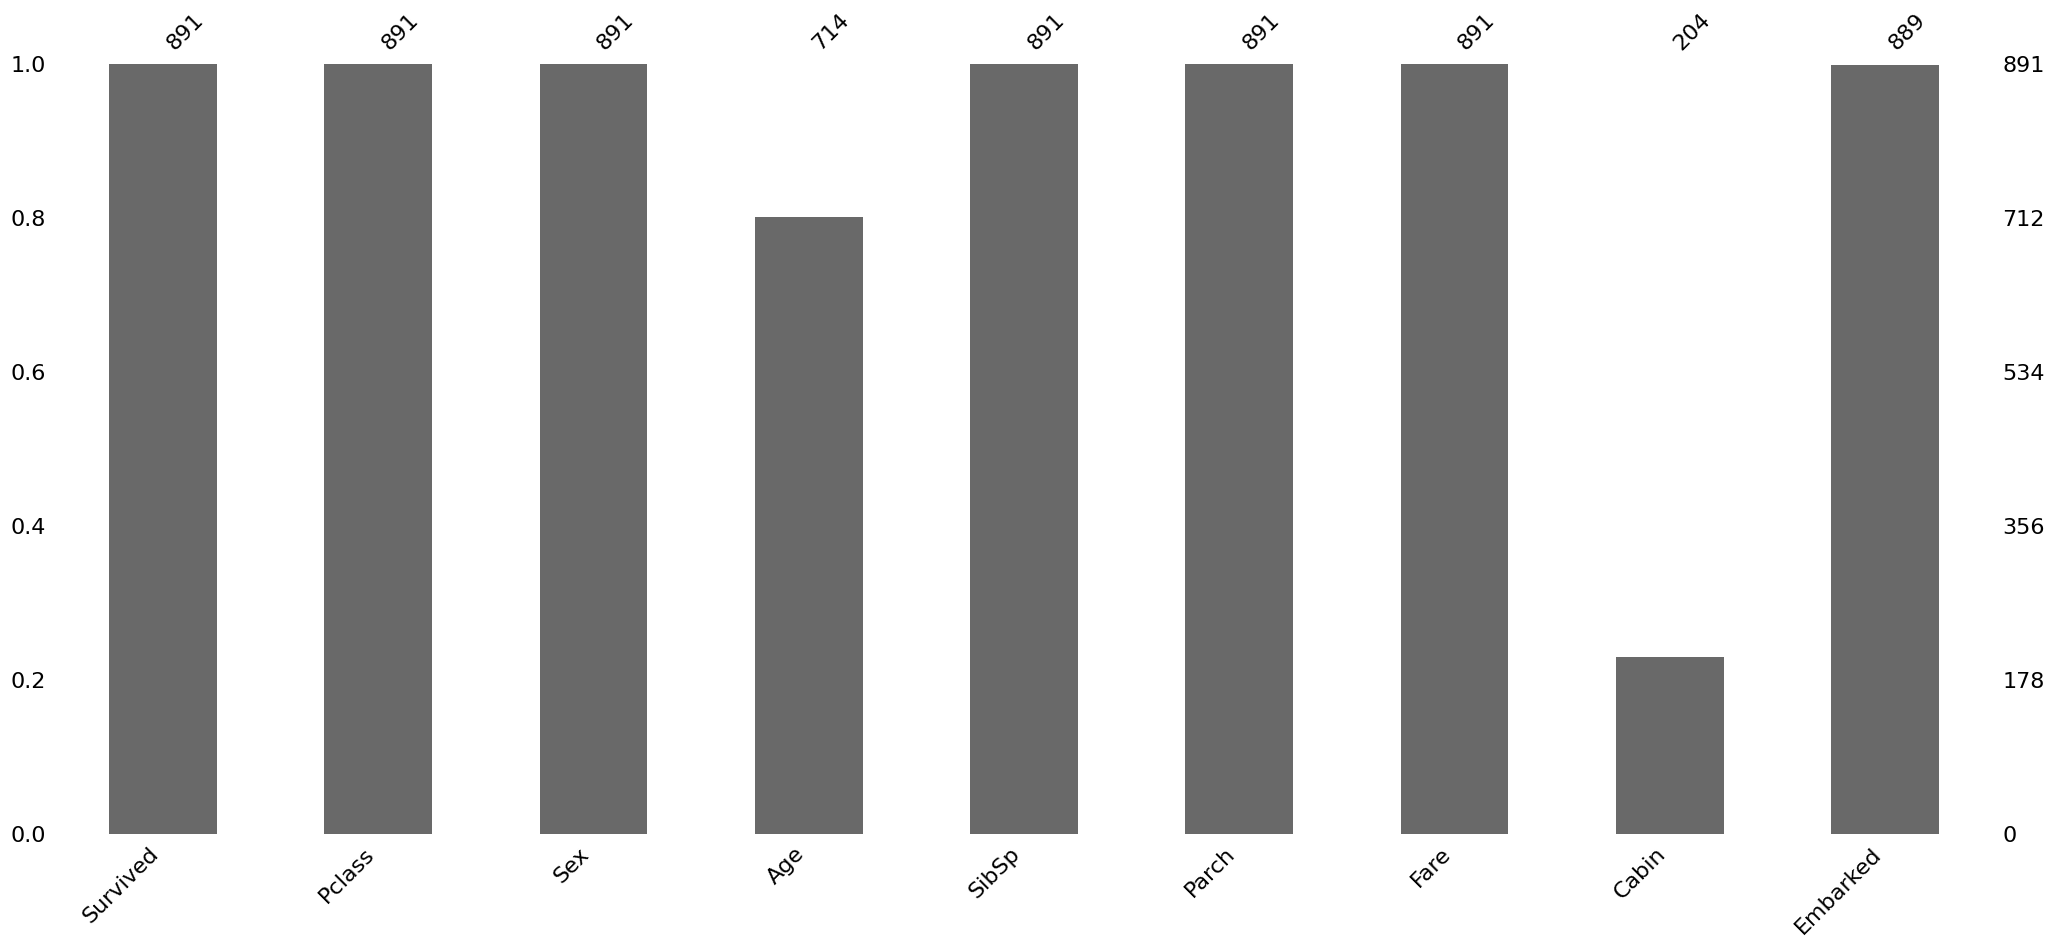

In [9]:
# Import libraries 
import missingno as msno

# Viewing missing values
msno.bar(dts)

In [10]:
# Treating NaN values
# 1. Age
dts.Age.describe(), dts.Age.mode()

(count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: Age, dtype: float64,
 0    24.0
 Name: Age, dtype: float64)

In [11]:
# Replace NaN values by the median
dts['Age'].fillna(dts['Age'].median(), inplace = True)

In [12]:
dts.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [13]:
# 2. Cabin
# Find the mode values
modes = dts['Cabin'].mode()

# Convert the modes to a list
mode_list = modes.tolist()

# Replace missing values with mode values
dts['Cabin'] = dts['Cabin'].apply(lambda x: np.random.choice(mode_list) if pd.isnull(x) else x)


In [14]:
# 3. Embarekd
dts.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# Replace NaN values by the mode
dts['Embarked'].fillna(dts['Embarked'].mode()[0], inplace = True)

3. Transform categorical data using method of your choice(labelEncoder/one hot encoding)

In [16]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

# Get the object columns in the DataFrame
obj_cols = dts.select_dtypes(include = 'object').columns.tolist()

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the object columns
dts[obj_cols] = dts[obj_cols].apply(lambda x: le.fit_transform(x))

4. Verify that your data is ready to be treated.

In [17]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 48.9 KB


In [18]:
dts.isnull().sum().max()

0